In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='darkgrid', font_scale=1.5)  #设置背景
plt.rcParams['font.sans-serif'] =['SimHei'] #设置字体，支持中文
plt.rcParams['axes.unicode_minus'] =False


# 1、数据查看和预处理

In [2]:
import os
# 对于电脑比较弱（4G内存，cpu比较弱）就在这里选前100万条数据即可，nrows=1000000
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype = str)

In [3]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [4]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category           time
0  98047837  232431562             1          NaN          4245  2014-12-06 02
1  97726136  383583590             1          NaN          5894  2014-12-09 20
2  98607707   64749712             1          NaN          2883  2014-12-18 11
3  98662432  320593836             1      96nn52n          6562  2014-12-06 10
4  98145908  290208520             1          NaN         13926  2014-12-16 21

In [5]:
# 缺失值分析，apply默认对列进行操作，x代表一列
data_user.apply(lambda x: sum(x.isnull())/len(x))

user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

In [6]:
#统计多少条是空的
data_user.apply(lambda x: sum(x.isnull()))

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [7]:
data_user.shape

(12256906, 6)

### 先对日期进行处理

In [8]:
# 把日期和小时分别取出来，从日期，小时两个角度分析购物行为
data_user['date'] = data_user['time'].str[0:10]
data_user['hour'] = data_user['time'].str[11:]  #如果发生溢出就分开执行

In [9]:
data_user.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [10]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category  \
0  98047837  232431562             1          NaN          4245   
1  97726136  383583590             1          NaN          5894   
2  98607707   64749712             1          NaN          2883   
3  98662432  320593836             1      96nn52n          6562   
4  98145908  290208520             1          NaN         13926   

            time        date hour  
0  2014-12-06 02  2014-12-06   02  
1  2014-12-09 20  2014-12-09   20  
2  2014-12-18 11  2014-12-18   11  
3  2014-12-06 10  2014-12-06   10  
4  2014-12-16 21  2014-12-16   21

In [13]:
#类型转换
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time']= pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype(np.int8) #节约内存

In [15]:
data_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                       int8
dtype: object

In [16]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category  \
0  98047837  232431562             1          NaN          4245   
1  97726136  383583590             1          NaN          5894   
2  98607707   64749712             1          NaN          2883   
3  98662432  320593836             1      96nn52n          6562   
4  98145908  290208520             1          NaN         13926   

                 time       date  hour  
0 2014-12-06 02:00:00 2014-12-06     2  
1 2014-12-09 20:00:00 2014-12-09    20  
2 2014-12-18 11:00:00 2014-12-18    11  
3 2014-12-06 10:00:00 2014-12-06    10  
4 2014-12-16 21:00:00 2014-12-16    21

In [17]:
#对数据进行时间排序，得到起始时间
data_user.sort_values(by ='time',ascending=True,inplace = True)

In [18]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category  \
1505077    73462715  378485233             1          NaN          9130   
8686537    36090137  236748115             1          NaN         10523   
4035788    40459733  155218177             1          NaN          8561   
10113411     814199  149808524             1          NaN          9053   
2936757   113309982    5730861             1          NaN          3783   

               time       date  hour  
1505077  2014-11-18 2014-11-18     0  
8686537  2014-11-18 2014-11-18     0  
4035788  2014-11-18 2014-11-18     0  
10113411 2014-11-18 2014-11-18     0  
2936757  2014-11-18 2014-11-18     0

In [19]:
data_user.tail()

user_id    item_id behavior_type user_geohash item_category  \
5241608   132653097  119946062             2          NaN          6054   
10296029  130082553  296196819             1          NaN         11532   
8527264    43592945  350594832             1      9rhhgph          9541   
6263497    12833799  186993938             1      954g37v          3798   
9200479    77522552   69292191             1          NaN           889   

                        time       date  hour  
5241608  2014-12-18 23:00:00 2014-12-18    23  
10296029 2014-12-18 23:00:00 2014-12-18    23  
8527264  2014-12-18 23:00:00 2014-12-18    23  
6263497  2014-12-18 23:00:00 2014-12-18    23  
9200479  2014-12-18 23:00:00 2014-12-18    23

In [20]:
#丢弃原有索引，按位置重新生成索引，在原有df生效
data_user.reset_index(drop =True,inplace =True)

In [21]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category       time  \
0   73462715  378485233             1          NaN          9130 2014-11-18   
1   36090137  236748115             1          NaN         10523 2014-11-18   
2   40459733  155218177             1          NaN          8561 2014-11-18   
3     814199  149808524             1          NaN          9053 2014-11-18   
4  113309982    5730861             1          NaN          3783 2014-11-18   

        date  hour  
0 2014-11-18     0  
1 2014-11-18     0  
2 2014-11-18     0  
3 2014-11-18     0  
4 2014-11-18     0

### 分析得出最火的单品、最火的品类、可能刷单的用户、最多的行为

In [23]:
# top是出现最多次数的那个str值，freq是top的值出现的次数
data_user.describe(include = ['object'])  #第二行可以看出行为类型，用户位置类别，商品品类

user_id    item_id behavior_type user_geohash item_category
count   12256906   12256906      12256906      3922082      12256906
unique     10000    2876947             4       575458          8916
top     36233277  112921337             1      94ek6ke          1863
freq       31030       1445      11550581         1052        393247

In [24]:
#可能是刷单的用户
data_user[data_user['user_id']=='36233277']

user_id    item_id behavior_type user_geohash item_category  \
40360     36233277  147216340             1      94ek6lk          4721   
40411     36233277  145482943             1      94ek6ln          7344   
40526     36233277  302098857             1      94ek6kg          7344   
40859     36233277  180885547             1      94ek6l1          4721   
41017     36233277  113357921             1      94ek6as          4721   
...            ...        ...           ...          ...           ...   
12255805  36233277  260021102             1      94ek6ke          2825   
12255823  36233277  312712899             1      94ek6ln          1863   
12255850  36233277   34128930             1      94ek6ep          9835   
12255932  36233277  116229820             1      94ek6lr          1863   
12255938  36233277   81245809             1      94ek6kc          9541   

                        time       date  hour  
40360    2014-11-18 07:00:00 2014-11-18     7  
40411    2014-11-18 07:00:00 2014-11-18     7  
40526    2014-11-18 07:00:00 2014-11-18     7  
40859    2014-11-18 07:00:00 2014-11-18     7  
41017    2014-11-18 07:00:00 2014-11-18     7  
...                      ...        ...   ...  
12255805 2014-12-18 23:00:00 2014-12-18    23  
12255823 2014-12-18 23:00:00 2014-12-18    23  
12255850 2014-12-18 23:00:00 2014-12-18    23  
12255932 2014-12-18 23:00:00 2014-12-18    23  
12255938 2014-12-18 23:00:00 2014-12-18    23  

[31030 rows x 8 columns]

In [25]:
# 计算所有列，各算各的
data_user.describe(include = 'all')

user_id    item_id behavior_type user_geohash item_category  \
count   12256906   12256906      12256906      3922082      12256906   
unique     10000    2876947             4       575458          8916   
top     36233277  112921337             1      94ek6ke          1863   
freq       31030       1445      11550581         1052        393247   
mean         NaN        NaN           NaN          NaN           NaN   
min          NaN        NaN           NaN          NaN           NaN   
25%          NaN        NaN           NaN          NaN           NaN   
50%          NaN        NaN           NaN          NaN           NaN   
75%          NaN        NaN           NaN          NaN           NaN   
max          NaN        NaN           NaN          NaN           NaN   
std          NaN        NaN           NaN          NaN           NaN   

                                 time                           date  \
count                        12256906                       12256906   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2014-12-04 04:47:28.445702144  2014-12-03 13:58:23.675396352   
min               2014-11-18 00:00:00            2014-11-18 00:00:00   
25%               2014-11-26 15:00:00            2014-11-26 00:00:00   
50%               2014-12-04 14:00:00            2014-12-04 00:00:00   
75%               2014-12-11 23:00:00            2014-12-11 00:00:00   
max               2014-12-18 23:00:00            2014-12-18 00:00:00   
std                               NaN                            NaN   

                hour  
count   1.225691e+07  
unique           NaN  
top              NaN  
freq             NaN  
mean    1.481799e+01  
min     0.000000e+00  
25%     1.000000e+01  
50%     1.600000e+01  
75%     2.000000e+01  
max     2.300000e+01  
std     6.474778e+00

# 1 计算每日的pv和uv
### pv：页面访问量，uv：不同用户访问量

In [26]:
#计算pv，后面选任何一列即可，可以选item_id
pv_daily = data_user.groupby('date').count()['user_id']

In [28]:
#得到了每天的pv
pv_daily.head()

<class 'pandas.core.series.Series'>


date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
Name: user_id, dtype: int64

In [29]:
#如果不小心把名字弄错了，不需要重新读取数据，直接改列名
#改为user_id1的目的是为了下面命名为pv,uv做准备
pv_daily = pv_daily.rename('user_id1') #注意这里一定要写赋值

In [30]:
#不设置下面内容，避免显示崩溃
#显示所有列
pd.set_option('display.max_columns', 30)
#显示所有行
pd.set_option('display.max_rows', 100)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [33]:
#每组的前三个用户，没啥用
data_user.groupby('date')['user_id'].head(3)

0            73462715
1            36090137
2            40459733
366701       81506172
366702        1926899
366703       51204443
725524       35427753
725525       73854016
725526       78314284
1078953      74952849
1078954     139174569
1078955      33596774
1412057      97019627
1412058     131112654
1412059     134233776
1773412      15541192
1773413      89428650
1773414      88090767
2156114      59659116
2156115     125482009
2156116      59511789
2534456     113693068
2534457     126215864
2534458      94992306
2904695     114726208
2904696      73196588
2904697      45773960
3265591      84441355
3265592      48677702
3265593      12570225
3636975      64699430
3636976      38387226
3636977      33513319
3977613      79134636
3977614     135639209
3977615      35272739
4342310     124063835
4342311      29689901
4342312     103936681
4743930      94943213
4743931      10825402
4743932      47693061
5138541     112044266
5138542     112044266
5138543      72990071
5543757   

In [39]:
data_user.groupby('date')['user_id'].head()

0            73462715
1            36090137
2            40459733
3              814199
4           113309982
              ...    
11881309     52895098
11881310     62360262
11881311     37981108
11881312     33984927
11881313    125912657
Name: user_id, Length: 155, dtype: object

In [41]:
#如何计算uv，针对用户访问进行去重，再计算数目
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())

In [43]:
uv_daily.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [170]:
#另外一种计算uv的方法
uv_daily1 = data_user.groupby('date').agg({'user_id':'nunique'})
uv_daily1.head()

user_id  item_id
date                        
2014-11-18     6343   141604
2014-11-19     6420   137984
2014-11-20     6333   135314
2014-11-21     6276   129629
2014-11-22     6187   140171

In [44]:
#pv和uv结合在一起，变为df
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)

In [45]:
pv_uv_daily.head()

user_id1  user_id
date                         
2014-11-18    366701     6343
2014-11-19    358823     6420
2014-11-20    353429     6333
2014-11-21    333104     6276
2014-11-22    361355     6187

In [46]:
#改列名
pv_uv_daily.rename(columns={'user_id1':'pv','user_id':'uv'},inplace =True)

In [47]:
pv_uv_daily.head()

pv    uv
date                    
2014-11-18  366701  6343
2014-11-19  358823  6420
2014-11-20  353429  6333
2014-11-21  333104  6276
2014-11-22  361355  6187

In [48]:
#写入文件
pv_uv_daily.to_csv('pv_uv.csv')

In [ ]:
# pv_uv_daily.head(5).to_excel('pv_uv.xlsx')  #大家用这个，安装openpyxl
pv_uv_daily.head(5).to_excel('pv_uv.xls')

In [ ]:
#pv_uv_daily.corr(method = 'spearman')

In [ ]:
#pv_uv_daily.corr(method = 'pearson')  #皮尔逊相关系数,到推荐那里讲

In [ ]:
#上面说明每天的访问量和访问用户是正相关的关系

### 画图得出结论：双12达到峰值

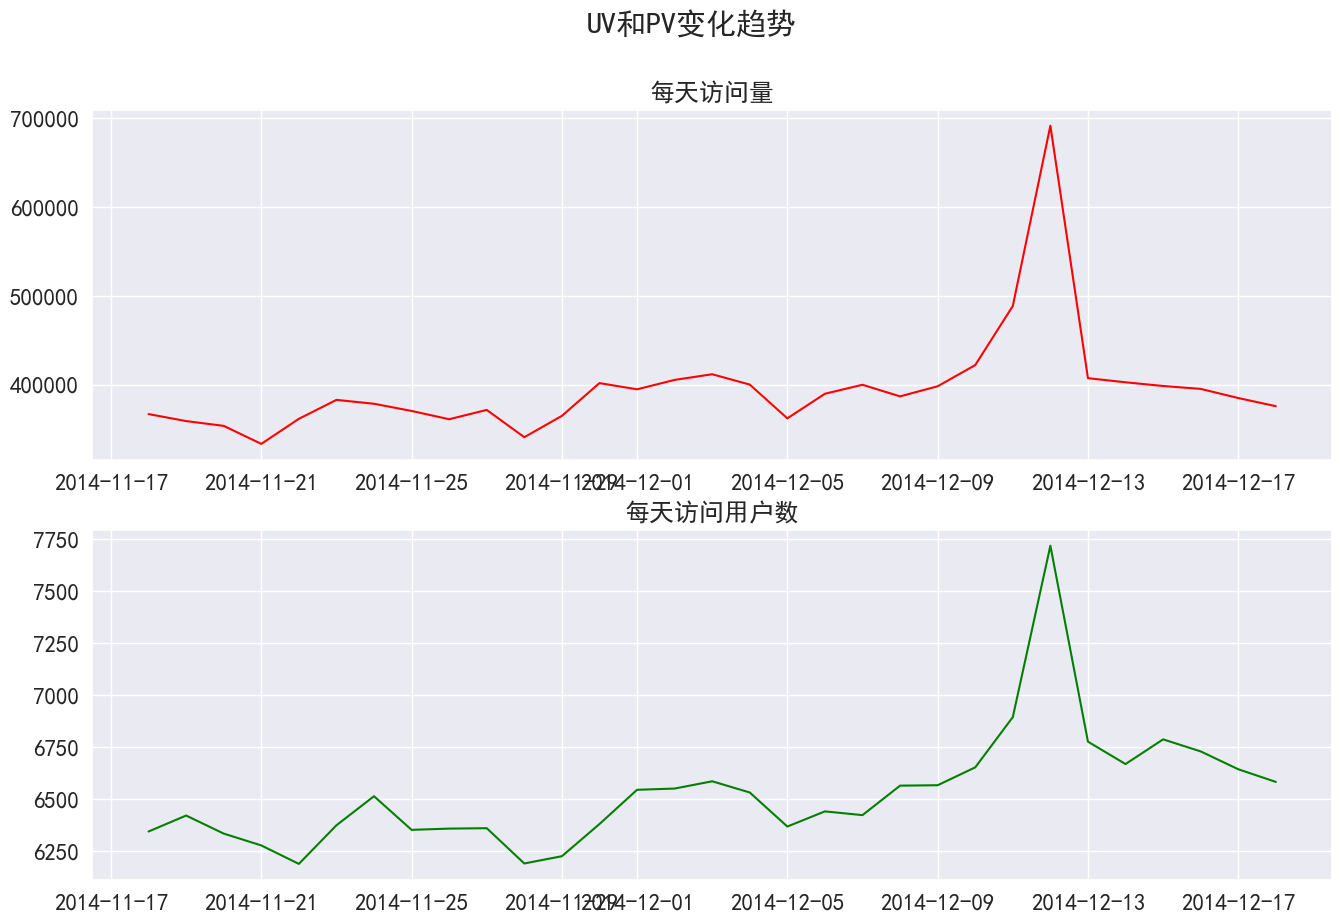

In [53]:
#默认显示一个月的区别
plt.figure(figsize=(16,10))

plt.subplot(211)  #等价于2,1,2，是2行1列图，这里是第一个图
plt.plot(pv_daily, color='red')  #pv_daily是一个series，index是x，values是y
plt.title('每天访问量')

plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('每天访问用户数')

plt.suptitle('UV和PV变化趋势')
plt.show()

## 多维拆解，从小时维度观察pv和uv

In [62]:
#小时的pv
pv_daily = data_user.groupby('hour').count()['user_id']

In [63]:
pv_daily

hour
0      517404
1      267682
2      147090
3       98516
4       80487
5       88296
6      158798
7      287337
8      396106
9      485951
10     550665
11     526940
12     531957
13     598343
14     594215
15     598849
16     576207
17     505936
18     547383
19     735192
20     935161
21    1090178
22    1088961
23     849252
Name: user_id, dtype: int64

In [65]:
#小时的uv
uv_daily = data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count())

In [66]:
uv_daily

hour
0     5786
1     3780
2     2532
3     1937
4     1765
5     2030
6     3564
7     5722
8     7108
9     7734
10    8139
11    8239
12    8314
13    8352
14    8255
15    8257
16    8320
17    8228
18    8278
19    8538
20    8780
21    8866
22    8599
23    7484
Name: user_id, dtype: int64

In [67]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)

In [69]:
pv_uv_daily.columns=['pv','uv'] #另外一种换索引名字的方式

In [71]:
pv_uv_daily

pv    uv
hour               
0      517404  5786
1      267682  3780
2      147090  2532
3       98516  1937
4       80487  1765
5       88296  2030
6      158798  3564
7      287337  5722
8      396106  7108
9      485951  7734
10     550665  8139
11     526940  8239
12     531957  8314
13     598343  8352
14     594215  8255
15     598849  8257
16     576207  8320
17     505936  8228
18     547383  8278
19     735192  8538
20     935161  8780
21    1090178  8866
22    1088961  8599
23     849252  7484

In [77]:
# 最大的pv、uv都是21点
print(pv_daily.idxmax())
print(uv_daily.idxmax())

21
21


In [ ]:
#pv_uv_daily.corr(method = 'spearman')

In [ ]:
#pv_uv_daily.corr(method = 'pearson')  #皮尔逊相关系数，看pv和uv相关性

### 画图得出结论：每天晚上的9、10点是购物高峰

pandas提供了一个非常方便的接口，允许你直接对DataFrame的列进行操作，包括绘图。

当你使用pv_uv_daily['pv'].plot()这样的语法时，实际上是调用了pandas库为Series对象提供的一个特殊方法.plot()。这个方法是matplotlib绘图方法的一个封装，它允许你直接对pandas对象进行绘图，而不需要显式地调用matplotlib的函数。

这样做的好处包括：

简洁性：你不需要从DataFrame中提取数据，然后再传递给matplotlib函数，可以直接在DataFrame的列上调用.plot()方法。

自动化：pandas会自动处理Series的索引作为x轴的数据，而Series的值作为y轴的数据。

一致性：pandas的.plot()方法提供了一种一致的方式来绘制不同的Series或DataFrame，无需改变代码结构。

功能集成：pandas的.plot()方法还提供了一些额外的功能，比如自动的图例生成，以及对时间序列数据的内置支持。

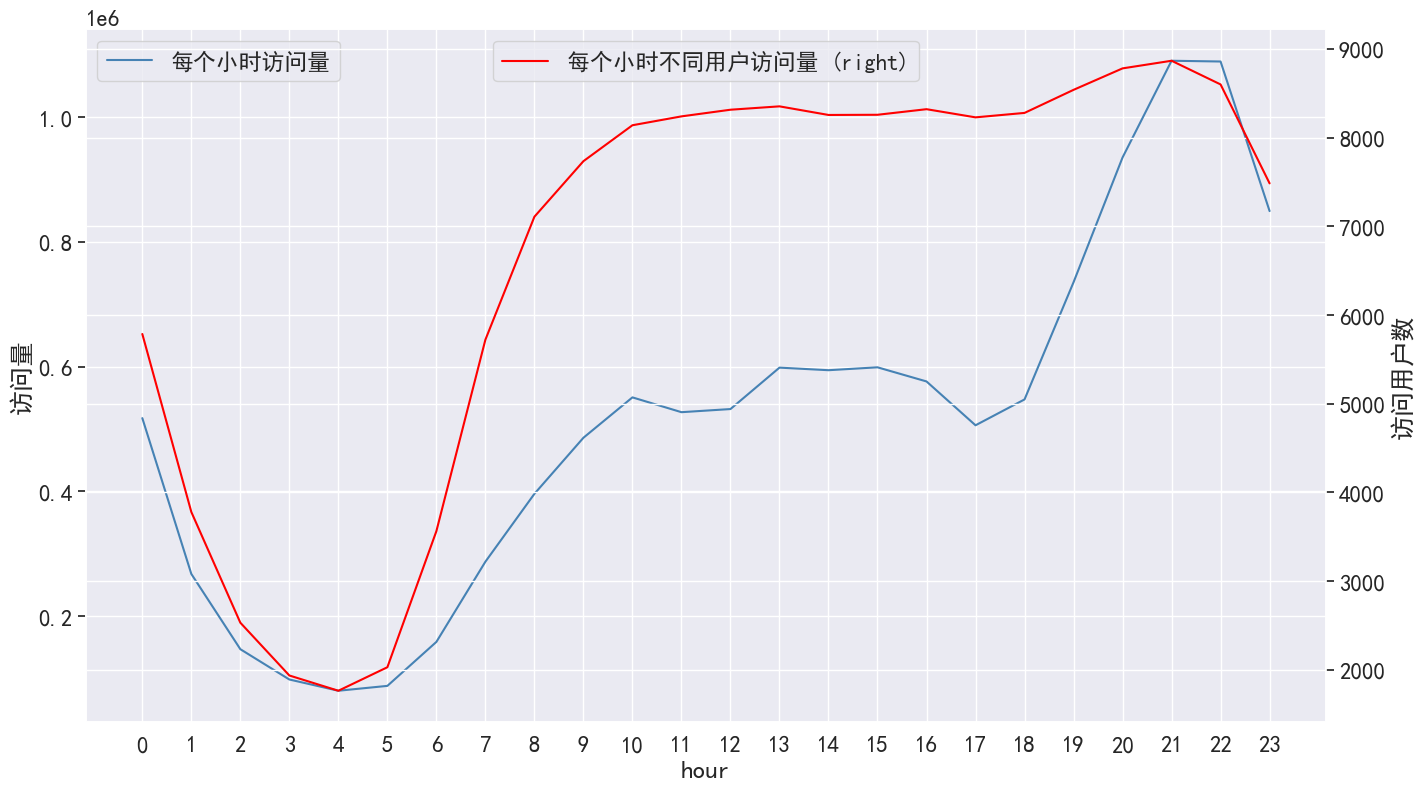

In [88]:
plt.figure(figsize=(16,9))

#plt.plot(pv_uv_daily['pv'], color='steelblue',label='每个小时访问量')
pv_uv_daily['pv'].plot(color= 'steelblue', label ='每个小时访问量')
plt.legend(loc ='upper center')
plt.ylabel('访问量')

# 创建一个辅助轴用于UV曲线
# ax2 = plt.twinx()  # 创建一个共享x轴的辅助y轴
# # 绘制UV曲线，使用辅助轴
# ax2.plot(pv_uv_daily['uv'], color='red', label='每个小时不同用户访问量')
# ax2.set_ylabel('访问用户数')  # 设置UV曲线的y轴标签（辅助轴）

pv_uv_daily['uv'].plot(color= 'red', label='每个小时不同用户访问量',secondary_y =True)
plt.ylabel('访问用户数')
plt.xticks(range(0,24),pv_uv_daily.index)
plt.legend(loc ='upper center')

plt.grid(True)
plt.show()

### 多维拆解，从小时的维度，看不同的行为，点击、收藏、加入购物车和支付

In [190]:
data_user.head()

user_id    item_id behavior_type user_geohash item_category       time  \
0   73462715  378485233             1          NaN          9130 2014-11-18   
1   36090137  236748115             1          NaN         10523 2014-11-18   
2   40459733  155218177             1          NaN          8561 2014-11-18   
3     814199  149808524             1          NaN          9053 2014-11-18   
4  113309982    5730861             1          NaN          3783 2014-11-18   

        date  hour  
0 2014-11-18     0  
1 2014-11-18     0  
2 2014-11-18     0  
3 2014-11-18     0  
4 2014-11-18     0

pivot_table()用于创建一个数据透视表

columns='behavior_type'：这个参数指定了数据透视表中的列。behavior_type是data_user DataFrame中的一个列名，它将被用作数据透视表中的列分组依据。

index='hour'：这个参数指定了数据透视表中的行索引。hour是data_user DataFrame中的一个列名，它将被用作数据透视表中的行索引。

data=data_user：这是要进行数据透视操作的原始数据集，即一个pandas.DataFrame对象。

values='item_id'：这个参数指定了要聚合的值。item_id是data_user DataFrame中的一个列名，它包含了需要聚合的数据。

aggfunc=np.size：这是一个聚合函数，用于对values参数指定的列中的值进行聚合。np.size是NumPy库中的一个函数，它返回数组元素的总数。在这个上下文中，它将计算每个behavior_type和hour组合中item_id的数量。

In [191]:
# 对于每个hour和behavior_type的组合，计算item_id的唯一数量。
pv_detail = pd.pivot_table(columns ='behavior_type',index ='hour' ,
                           data = data_user,
                           values = 'item_id',aggfunc=np.size)

In [192]:
pv_detail #点击、收藏、加入购物车和支付 的比例

behavior_type        1      2      3     4
hour                                      
0               487341  11062  14156  4845
1               252991   6276   6712  1703
2               139139   3311   3834   806
3                93250   2282   2480   504
4                75832   2010   2248   397
5                83545   2062   2213   476
6               150356   3651   3768  1023
7               272470   5885   7044  1938
8               374701   7849   9970  3586
9               456781  10507  12956  5707
10              515960  11185  16203  7317
11              493679  10918  15257  7086
12              500036   9940  15025  6956
13              561513  11694  17419  7717
14              558246  11695  17067  7207
15              562238  12010  17289  7312
16              541846  11127  16304  6930
17              476369   9754  14515  5298
18              517078  10342  14823  5140
19              696035  13952  18853  6352
20              885669  16599  25021  7872
21             1030483  20397  30469  8829
22             1027269  20343  32504  8845
23              797754  17705  27434  6359

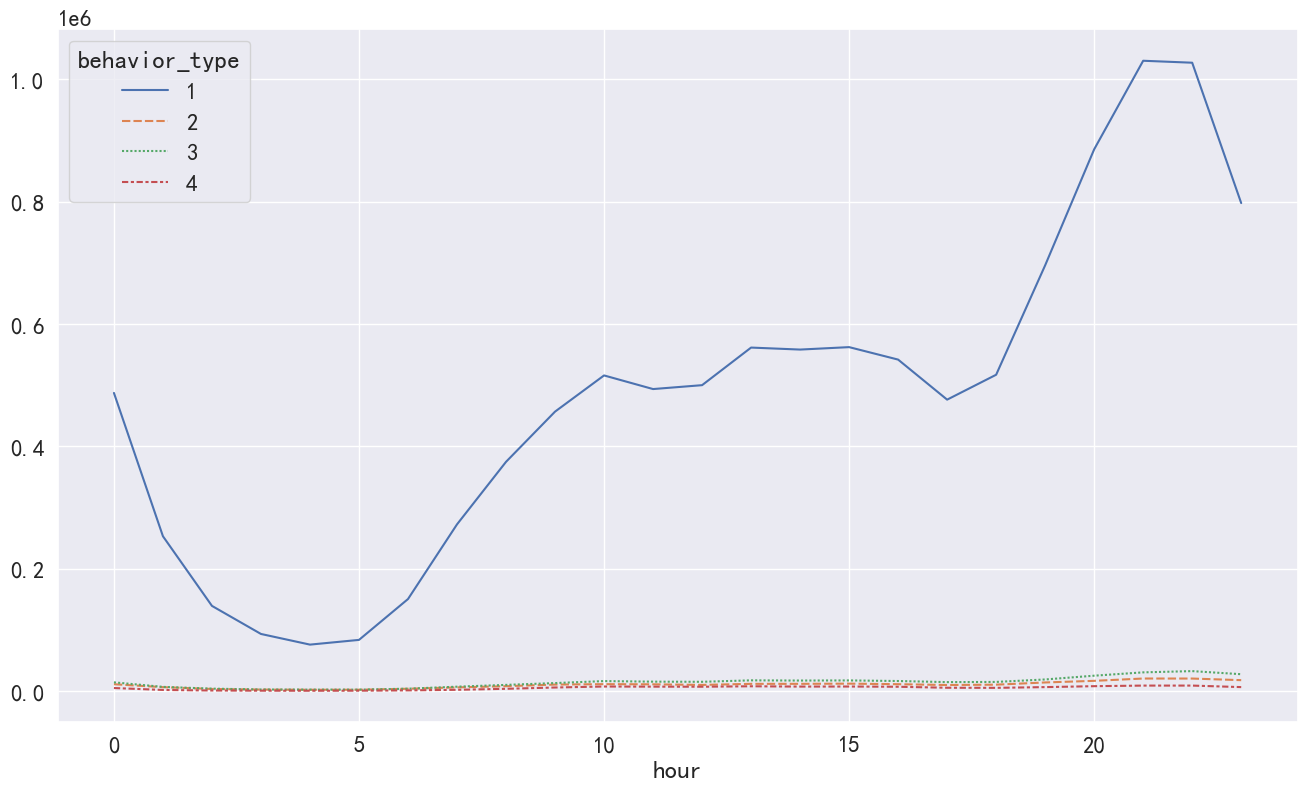

In [103]:
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail)
# 使用seaborn的lineplot函数来绘制线图。
# 这里传递给lineplot的data参数是pv_detail数据透视表的子集，由iloc[:,1:]指定
# sns.lineplot会自动处理多条线的情况，
# 如果pv_detail的列（除了索引列）代表不同的类别或组，那么lineplot将为每个类别绘制一条线。
plt.show()

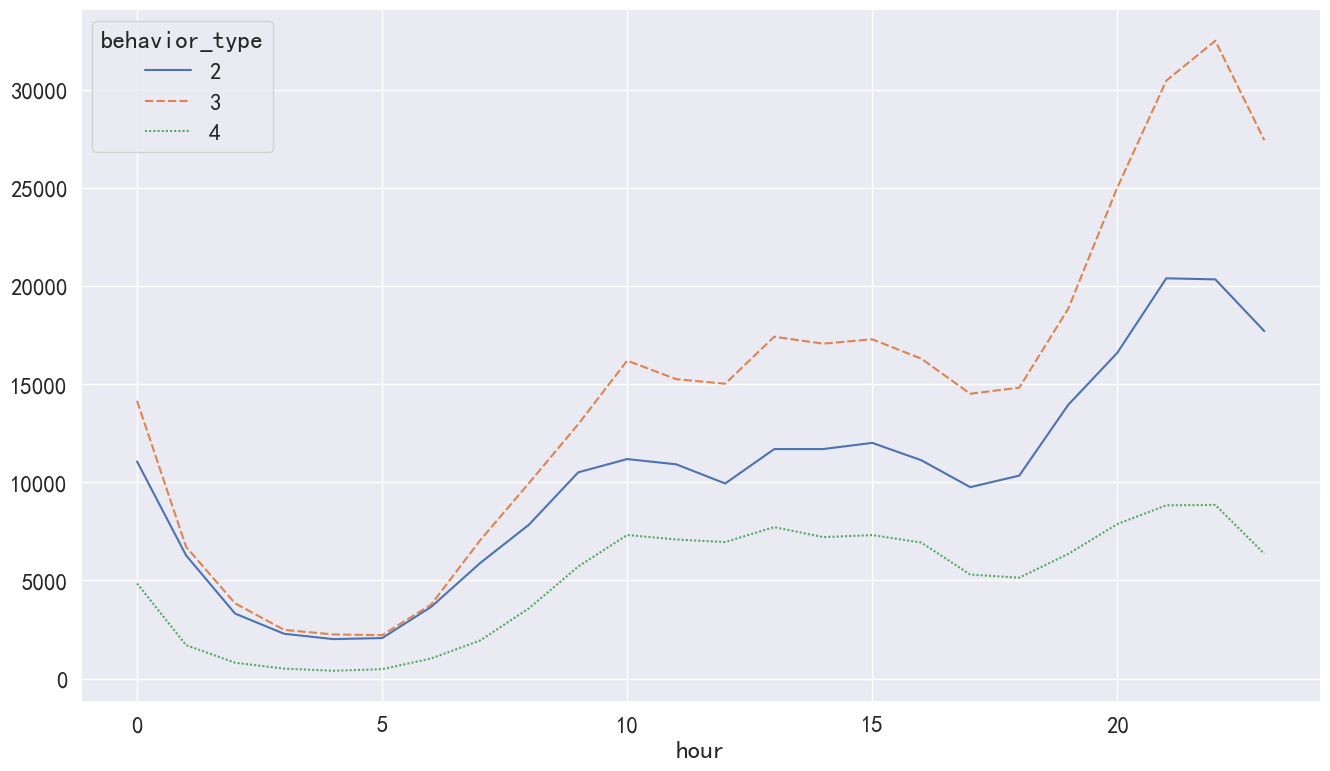

In [104]:
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail.iloc[:,1:])
plt.show()

# ARPU和ARPPU
### ARPU= 总收入/用户总数
### ARPPU= 总收入/付费用户总数

In [116]:
data_user_buy = data_user[data_user.behavior_type =='4'].groupby('user_id').size()

In [193]:
data_user_buy  #每个用户的购买次数

user_id
100001878    36
100011562     3
100012968    15
100014060    24
100024529    26
             ..
99960313      8
9996155       6
99963140     19
99968428     38
99989881     17
Length: 8886, dtype: int64

In [155]:
print(data_user[data_user.behavior_type =='4'].info())    # 120205次购买
print(np.sum(data_user_buy.values))  # 两种计算方法

<class 'pandas.core.frame.DataFrame'>
Index: 120205 entries, 103 to 12256879
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        120205 non-null  object        
 1   item_id        120205 non-null  object        
 2   behavior_type  120205 non-null  object        
 3   user_geohash   38608 non-null   object        
 4   item_category  120205 non-null  object        
 5   time           120205 non-null  datetime64[ns]
 6   date           120205 non-null  datetime64[ns]
 7   hour           120205 non-null  int8          
dtypes: datetime64[ns](2), int8(1), object(5)
memory usage: 7.5+ MB
None
120205


In [127]:
data_user_buy.describe()  #可以知道大部分用户一个月的购买次数是8次

count    8886.000000
mean       13.527459
std        19.698786
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       809.000000
dtype: float64

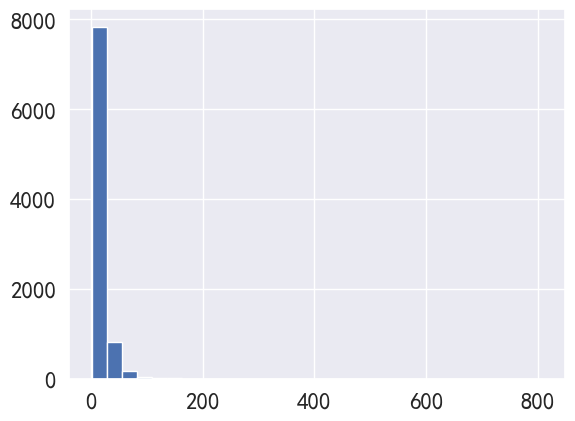

In [128]:
plt.hist(x =data_user_buy, bins=30)
plt.show()
#通过图形发现大部分人的购买次数都小于20次，做一下处理，再画直方图

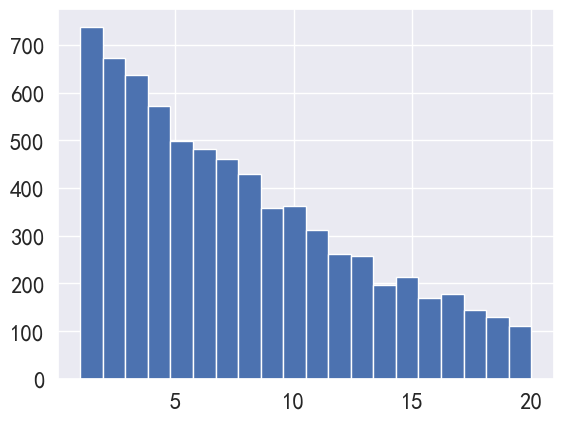

In [129]:
plt.hist(x =data_user_buy[data_user_buy<=20], bins=20)
plt.show()

In [156]:
data_user_buy.sum()*50/10000  #ARPU值
# data_user_buy.sum()是每个用户购买次数之和，这里假设每次消费50元。10000是总用户数，之前算出来了

601.025

### 下面计算日ARPPU

In [160]:
data_user_buy1= data_user[data_user.behavior_type =='4' ].groupby(['date' , 'user_id']).count()

In [161]:
data_user_buy1.head()

item_id  behavior_type  user_geohash  item_category  \
date       user_id                                                          
2014-11-18 100001878        1              1             1              1   
           100014060        2              2             2              2   
           100024529        6              6             0              6   
           100027681        3              3             0              3   
           10004287         2              2             0              2   

                      time  hour  
date       user_id                
2014-11-18 100001878     1     1  
           100014060     2     2  
           100024529     6     6  
           100027681     3     3  
           10004287      2     2

In [162]:
 # 不同日期、不同用户的购买行为次数
data_user_buy1['behavior_type'].reset_index().rename(columns={'behavior_type':' total'}).head()

date    user_id   total
0 2014-11-18  100001878       1
1 2014-11-18  100014060       2
2 2014-11-18  100024529       6
3 2014-11-18  100027681       3
4 2014-11-18   10004287       2

In [194]:
# 按照日期不同用户的购买行为次数
# 把上面两步二和一
data_user_buy1= data_user[data_user.behavior_type =='4' ].groupby(['date' , 'user_id']).\
count()['behavior_type'].reset_index().rename(columns={'behavior_type':'total'})

In [195]:
data_user_buy1.head()

date    user_id  total
0 2014-11-18  100001878      1
1 2014-11-18  100014060      2
2 2014-11-18  100024529      6
3 2014-11-18  100027681      3
4 2014-11-18   10004287      2

In [197]:
data_user_buy1.describe()

date         total
count                          49201  49201.000000
mean   2014-12-03 14:07:33.795654400      2.443141
min              2014-11-18 00:00:00      1.000000
25%              2014-11-26 00:00:00      1.000000
50%              2014-12-04 00:00:00      1.000000
75%              2014-12-12 00:00:00      3.000000
max              2014-12-18 00:00:00    185.000000
std                              NaN      3.307288

In [200]:
data_user_buy1.groupby('date').sum()['total']   # 每天的购买行为次数之和

date
2014-11-18     3730
2014-11-19     3686
2014-11-20     3462
2014-11-21     3021
2014-11-22     3570
2014-11-23     3347
2014-11-24     3426
2014-11-25     3464
2014-11-26     3573
2014-11-27     3670
2014-11-28     3218
2014-11-29     3211
2014-11-30     3616
2014-12-01     3909
2014-12-02     3621
2014-12-03     3885
2014-12-04     3691
2014-12-05     3319
2014-12-06     3272
2014-12-07     3256
2014-12-08     3419
2014-12-09     3449
2014-12-10     3216
2014-12-11     3226
2014-12-12    15251
2014-12-13     3478
2014-12-14     3483
2014-12-15     3764
2014-12-16     3771
2014-12-17     3615
2014-12-18     3586
Name: total, dtype: int64

In [201]:
data_user_buy1.groupby('date').count()['total']  # 每天的购买用户数

date
2014-11-18    1539
2014-11-19    1511
2014-11-20    1492
2014-11-21    1330
2014-11-22    1411
2014-11-23    1436
2014-11-24    1524
2014-11-25    1497
2014-11-26    1487
2014-11-27    1527
2014-11-28    1442
2014-11-29    1377
2014-11-30    1534
2014-12-01    1657
2014-12-02    1585
2014-12-03    1697
2014-12-04    1585
2014-12-05    1493
2014-12-06    1452
2014-12-07    1403
2014-12-08    1551
2014-12-09    1429
2014-12-10    1442
2014-12-11    1449
2014-12-12    3897
2014-12-13    1549
2014-12-14    1506
2014-12-15    1627
2014-12-16    1650
2014-12-17    1570
2014-12-18    1552
Name: total, dtype: int64

In [202]:
# 每个付费用户，平均每天的支付次数
data_user_buy2=data_user_buy1.groupby('date').sum()['total']/data_user_buy1.groupby('date').count()['total']

In [203]:
data_user_buy2

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

In [175]:
data_user_buy1.groupby('date').mean()['total']  #另外一种计算方法

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

In [183]:
data_user_buy2.index

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
               '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
               '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
               '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
               '2014-12-16', '2014-12-17', '2014-12-18'],
              dtype='datetime64[ns]', name='date', freq=None)

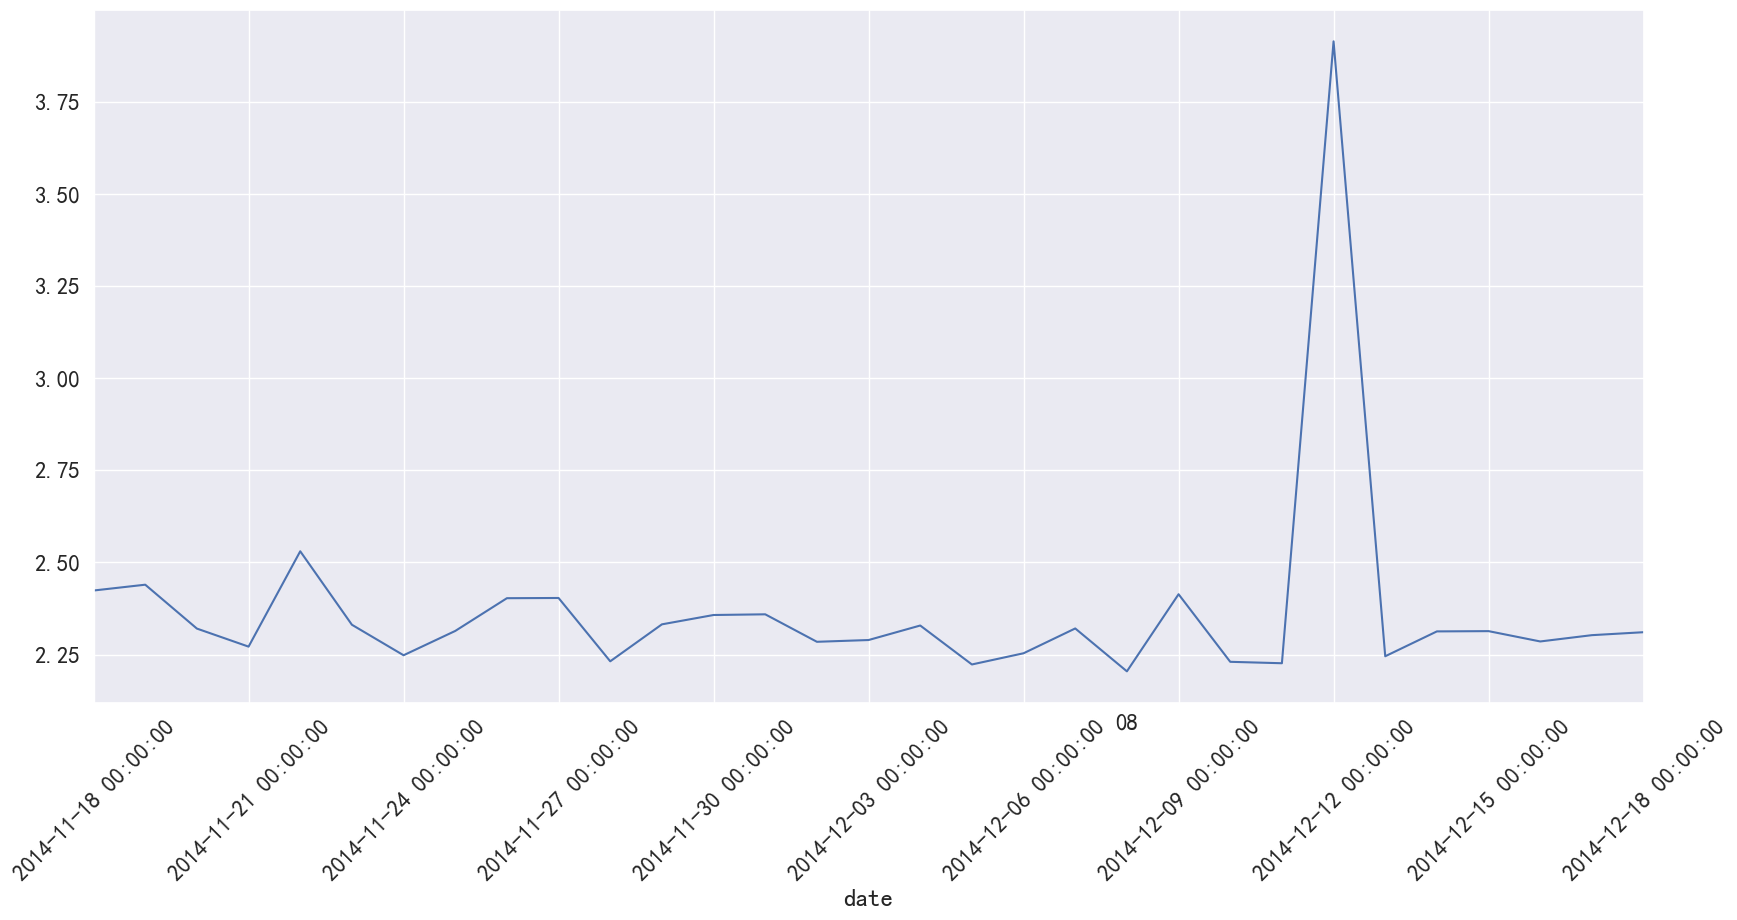

In [185]:
plt.figure(figsize=(20,9))
data_user_buy2.plot()
plt.xticks(data_user_buy2.index[::3],data_user_buy2.index[::3],rotation=45) # 11月18号到12月18号
plt.show()

In [204]:
data_user_buy2.describe()   #发现每天大家的平均购物次数是2.3次，双12当天达到最高3.9次

count    31.000000
mean      2.368446
std       0.296108
min       2.204384
25%       2.262436
50%       2.313460
75%       2.358159
max       3.913523
Name: total, dtype: float64

### 这里只计算了日均购买次数，如果要计算日ARPPU，还需要乘以50元（假设每次消费50元）